---
## <font color = orange><center>**Predicción del Precio de Vuelos en India**</center></font>


## <font color = orange><center>**Modelo de Machine Learning**</center></font>

### <font color = navyblue><center>Carlos Andrés Calvo García  |  Ago/2025</center></font>


---

### **<font color = 'lightgreen'>1.   Definición del problema</font>**





### **Descripción General del Problema**

El precio del tiquete para un vuelo de avión depende de muchas variables como la aerolinea, ya que muchas veces una misma ruta en la misma fecha puede tener diferencias significativas en el precio por una aerolínea en comparación con otra, dado que muchas de éstas tienen un modelo de negocio que apunta a tarifas bajas, por lo general a costa de menor capacidad de equipaje incluído.

Otra variable que influye en el precio de los tiquetes es la fecha, ya que por ejemplo si cae en un fin de semana (vie,sab,dom) o en un día festivo, serán más costosos que en el resto de días. Y por supuesto la hora también es importante, pues hay un rango de horas que se considera 'prime' y que es preferido por la mayoría a la hora de viajar, ese es más costoso que por ejemplo viajar muy tarde o madrugar demasiado.

Como es obvio, el origen y el destino del vuelo afectan directamente el precio del tiquete, ya que la distancia entre éstos está relacionada directamente con los costos asociados al vuelo, como el consumo de combustible, los hororarios de la tripulación, los alimentos y bebidas ofrecidos a los pasajeros, entre otros.

Y otro factor adicional que afecta el precio mencionado es el número de paradas que incluya la ruta.  Este factor no es del todo claro cómo lo interpretan las aerolíneas, pues desde el punto de vista de un pasajero es preferible conseguir un vuelo que en un solo tramo viaje directamente desde el origen hacia el destino, por lo que las paradas adicionales vendrían a ser una desventaja para él y por lo tanto deberían disminuírle la tarifa por las incomodidades en que va a incurrir, como el tiempo adicional, transbordos, etc.  Sin embargo, a menudo se encuentran vuelos que incrementan su tarifa entre más paradas tengan, como si el pasajero pudiera disfrutar de los sitios donde el avión planea hacer una escala.

Por lo expuesto antes, determinar el precio de la tarifa de un vuelo no es algo que podamos hacer de manera intuitiva, pues depende de muchas variables, así que se necesita de recurrir a una técnica más científica como las que nos ofrece el *Machine Learning*: La creación de un modelo de aprendizaje que, luego de analizar las variables existentes, determine cuáles son las que influyen más en el precio, para luego ser capaz de predecirlo usando como entrada las variables elegidas.

### **Variable Objetivo**

Es casi evidente desde la definición del problema, pero importante especificar claramente que la variable objetivo del modelo de aprendizaje es **el precio del tiquete**; es decir, ésta es la variable que se intentará predecir teniendo como entrada todas o algunas de las otras variables con que cuenta el conjunto de datos y que fueron también descritas en la definición.

### **Metodología y Tareas a Realizar**

En términos generales la metodología a utilizar consiste en dividir el set de datos en dos subconjuntos, uno para entrenar el modelo y otro para probar el desempeño del modelo, ya que al conocer con certeza los precios de este subconjunto de prueba podemos calcluar el porcentaje de precisión que tuvo, además de otras métricas más específicas.

Sin embargo, ya con un poco más de detalle, este proceso se va a realizar con 3 diferentes modelos de machine learning, por lo que tendremos mayor probabilidad de obtener un buen resultado predictorio al final.  

Por otra parte, el set de datos que nos entregan como insumo consta de 2 tablas diferentes pero con las mismas columnas: una para los tiquetes de clase empresarial y otra para los de clase económica, lo que significa que la *clase* del tiquete es a su vez una variable que afecta también el precio.  Así pues que al tratarse de 2 datasets se deberá concatenarlos para obtener un solo conjunto de datos, pero creando una variable nueva en cada uno que identifique la clase a la que pertenece, y como los modelos de ML solo trabajan con variables numéricas, la variable *clase* se creará así: 0-Económica, 1-Empresarial.

Una vez se tenga un solo dataset se debe iniciar por hacer un análisis exploratorio que permita conocer en detalle las variables de que consta, y su contenido, incluyendo los problemas de limpieza que se deberán corregir, como datos nulos, datos errados, datos atípicos, entre otros.  También se deben analizar las distribuciones de las variables de forma independiente, así como las correlaciones que puedan existir entre pares de variables.

Posterior a esto se deben realizar las tareas de limpieza que se evidenciaron en el paso anterior, y una vez teniendo el dataset limpio, hacer las transfomaciones que se crean necesarias, tales como crear nuevas variables, hacer codificaciones a algunas de ellas, eliminar las que no aportan valor analítico, etc.

Ya con el dataset en este punto, listo para lanzarlo a los modelos ML, se elegirán 3 modelos y se hará la división del dataset en los conjuntos de entrenamiento y prueba, que serán usados por los 3 modelos elegidos.

A continuación, se hará el entrenamiento de los 3 modelos usando para esto el subset de datos destinados para tal fin, y luego se hará con cada uno las predicciones usando el subset de datos de prueba.

Lo que sigue es medir el rendimiento de los 3 modelos elegidos, usando varias métricas que nos permitan comparar entre sí los modelos y definir con certeza cuál hizo predicciones más acertadas, para finalmente obtener unas conclusiones sobre este problema y la mejor manera de tratarlo para hacer predicciones que se ajusten más a las variables que nos proveen como entrada.


### **<font color = 'lightgreen'>2.   Importación de Librerías y Carga de Datos</font>**




In [87]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [88]:
# Carga del dataset 1
dfEconomy = pd.read_excel('economy.xlsx')
dfEconomy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955


In [89]:
# Carga del dataset 2
dfBusiness = pd.read_excel('business.xlsx')
dfBusiness.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


### **<font color = 'lightgreen'>3.   Reporte de calidad de los datos</font>**

En este paso se verifica la calidad de los datos recibidos, indicando las estrategias que se van a utilizar para resolver aquellos desafíos encontrados.


-------

###  3.1 Concatenación de los dataset 
Como se indicó en la metodología, se agrega la nueva variable **clase** a cada dataset y luego se concatenan, para hacer las tareas de limpieza, codificación y transformación una sola vez.

In [90]:
# Se agreaga la nueva variable clase a cada dataset
dfEconomy['clase'] = 0  # --> 'economy'
dfBusiness['clase'] = 1 # --> 'business'

In [91]:
# Se consulta la cantidad de filas y columnas de cada dataset
print("Economy: \n", dfEconomy.shape)
print("Business: \n", dfBusiness.shape)
print("\nFilas esperadas: \n", dfEconomy.shape[0] + dfBusiness.shape[0])

Economy: 
 (206774, 12)
Business: 
 (93487, 12)

Filas esperadas: 
 300261


In [92]:
# Se concatenan los datasets
df = pd.concat([dfEconomy, dfBusiness], ignore_index=True)

In [93]:
# Verificación del total de filas y columnas obtenidas
print("Total filas y columnas: \n", df.shape)

Total filas y columnas: 
 (300261, 12)


------- 

### 3.2 Validación de tipos de datos y valores nulos


In [94]:
# Verificación de los tipos de datos y valores nulos en el dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   ch_code     300261 non-null  object        
 3   num_code    300261 non-null  int64         
 4   dep_time    300261 non-null  object        
 5   from        300261 non-null  object        
 6   time_taken  300261 non-null  object        
 7   stop        300261 non-null  object        
 8   arr_time    300261 non-null  object        
 9   to          300261 non-null  object        
 10  price       300261 non-null  object        
 11  clase       300261 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 27.5+ MB


Hasta este punto se puede concluir que las variables date, num_code, y clase tienen el tipo de dato correcto, y que ninguna variable presenta valores nulos.  Las demás variables se analizarán de forma individual:

#### > Análisis de Variable: **airline**

In [95]:
# Análisis de la variable airline 
df['airline'].value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

Esta variable, al ser de tipo texto, requiere que se le haga codificación para enviar a los modelos ML, pero esto se hará en el punto *5-Transformaciones*, por ahora se dejará así mientras se le hace un análisis exploratorio.

#### > Análisis de Variable: **ch_code**

In [96]:
dfEconomy.head(20)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,0
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,0
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,0
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,0
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,0
5,2022-02-11,Vistara,UK,945,11:40:00,Delhi,02h 20m,non-stop,14:00:00,Mumbai,5955,0
6,2022-02-11,Vistara,UK,927,09:30:00,Delhi,02h 05m,non-stop,11:35:00,Mumbai,6060,0
7,2022-02-11,Vistara,UK,951,14:20:00,Delhi,02h 10m,non-stop,16:30:00,Mumbai,6060,0
8,2022-02-11,GO FIRST,G8,334,08:00:00,Delhi,02h 10m,non-stop,10:10:00,Mumbai,5954,0
9,2022-02-11,GO FIRST,G8,336,14:20:00,Delhi,02h 15m,non-stop,16:35:00,Mumbai,5954,0


Al revisar los datos que contiene esta variable se presume que el código que se muestra referencia directamente la aerolínea, ya que se observa que el ch_code que acompaña una aerolinea es aparentemente la misma siempre, por ejemplo:

Air India	--> AI

Vistara	    --> UK

GO FIRST	--> G8

SpiceJet	--> SG

Se hará un sondeo para determinar si es correcta la hipótesis:

In [97]:
dfEconomy[dfEconomy['airline']=='SpiceJet']['ch_code'].value_counts()

ch_code
SG    9011
Name: count, dtype: int64

In [98]:
dfEconomy[dfEconomy['airline']=='Vistara']['ch_code'].value_counts()

ch_code
UK    67270
Name: count, dtype: int64

In [99]:
dfEconomy[dfEconomy['airline']=='GO FIRST']['ch_code'].value_counts()

ch_code
G8    23177
Name: count, dtype: int64

Con esas 3 pruebas se concluye que la variable *ch_code* está directamente ligada a *airline* y por lo tanto no aporta valor analítico al problema y además podría generar multicolinealidad, por lo cual se eliminará.

In [100]:
df.drop(columns=['ch_code'], inplace=True)
df.head()

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase
0,2022-02-11,SpiceJet,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,0
1,2022-02-11,SpiceJet,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,0
2,2022-02-11,AirAsia,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,0
3,2022-02-11,Vistara,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,0
4,2022-02-11,Vistara,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,0


#### > Análisis de las Variables: **dep_time** y **arr_time**

Estas variables guardan, respectivamente, la hora de salida y hora de llegada del vuelo en cuestión, pero no puede ser tratada como hora dado que fueron cargadas como *object*.  

La sugerencia es convertirlo a un tipo de dato *datetime64[ns]* para poder luego hacer filtrado por horas, si se necesita, así para esto se le agregue una fecha ficticia (1900-01-01)

In [101]:
# Se convierten a tipo datetime las variables dep_time y arr_time
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M:%S')
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M:%S')

In [102]:
# Se verifica el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   num_code    300261 non-null  int64         
 3   dep_time    300261 non-null  datetime64[ns]
 4   from        300261 non-null  object        
 5   time_taken  300261 non-null  object        
 6   stop        300261 non-null  object        
 7   arr_time    300261 non-null  datetime64[ns]
 8   to          300261 non-null  object        
 9   price       300261 non-null  object        
 10  clase       300261 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(6)
memory usage: 25.2+ MB


In [103]:
# Se verifica el cambio
df.head()

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,02h 10m,non-stop,1900-01-01 21:05:00,Mumbai,5953,0
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,02h 20m,non-stop,1900-01-01 08:40:00,Mumbai,5953,0
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,02h 10m,non-stop,1900-01-01 06:35:00,Mumbai,5956,0
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,02h 15m,non-stop,1900-01-01 12:35:00,Mumbai,5955,0
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,02h 20m,non-stop,1900-01-01 11:10:00,Mumbai,5955,0


#### > Análisis de las Variables: **from** y **to**

In [104]:
df['from'].value_counts()

from
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

In [105]:
df['to'].value_counts()

to
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

Para estas dos variables se usará el mismo criterio que para 'airline'; ambas necesitan codificación pero se hará después de usarlas en el EDA, en el punto *5-Transformaciones*.

#### > Análisis de Variable: **time_taken**

Esta variable indica el tiempo de duración total de cada vuelo, pero lo hace en forma de texto al usar las letras *h* para horas y *m* para minutos. Ésta debe ser convertida a una sola unidad de medida de tiempo, puede ser horas, minutos o incluso segundos, y así convertirla a un tipo de datos numérico.  Para que sea preferiblemente un número entero es mejor que sea a minutos o segundos, ya que en horas tendría una fracción decimal.

In [106]:
# Se verifica si la variable time_taken tiene valores decimales (punto decimal)
mask = df["time_taken"].str.contains(r"\d+\.\d+", regex=True, na=False)
df[mask]

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase
96486,2022-02-26,GO FIRST,146,1900-01-01 05:45:00,Bangalore,1.03h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,1900-01-01 09:10:00,Mumbai,5177,0
104676,2022-02-26,GO FIRST,146,1900-01-01 05:45:00,Bangalore,1.02h m,2+-stop,1900-01-01 08:00:00,Kolkata,5177,0
111315,2022-02-26,GO FIRST,146,1900-01-01 05:45:00,Bangalore,1.03h m,2+-stop,1900-01-01 09:30:00,Hyderabad,4337,0
154007,2022-02-25,GO FIRST,517,1900-01-01 20:45:00,Hyderabad,1.01h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,1900-01-01 21:50:00,Delhi,6132,0


In [107]:
# Se crea columna con el tiempo total en minutos teniendo en cuenta que algunos valores de time_taken tienen horas con decimales
df['total_time'] = (
    df['time_taken'].str.extract(r"(\d+(?:\.\d+)?\s*)h").astype(float).fillna(0)*60 +  # Horas
    df['time_taken'].str.extract(r"(\d+)\s*m").astype(float).fillna(0)  # Minutos      # Minutos
)
df.head()

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase,total_time
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,02h 10m,non-stop,1900-01-01 21:05:00,Mumbai,5953,0,130.0
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,02h 20m,non-stop,1900-01-01 08:40:00,Mumbai,5953,0,140.0
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,02h 10m,non-stop,1900-01-01 06:35:00,Mumbai,5956,0,130.0
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,02h 15m,non-stop,1900-01-01 12:35:00,Mumbai,5955,0,135.0
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,02h 20m,non-stop,1900-01-01 11:10:00,Mumbai,5955,0,140.0


In [108]:
# Antes de eliminar la columna original time_taken, se verifican nulos en la nueva columna
df[df['total_time'].isna()]

,date,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase,total_time


In [109]:
# Se elimina la variable original time_taken y se renombra la nueva variable
df.drop(columns=['time_taken'], inplace=True)
df.rename(columns={'total_time': 'time_taken'}, inplace=True)
df.head()

,date,airline,num_code,dep_time,from,stop,arr_time,to,price,clase,time_taken
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,non-stop,1900-01-01 21:05:00,Mumbai,5953,0,130.0
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,non-stop,1900-01-01 08:40:00,Mumbai,5953,0,140.0
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,non-stop,1900-01-01 06:35:00,Mumbai,5956,0,130.0
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,non-stop,1900-01-01 12:35:00,Mumbai,5955,0,135.0
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,non-stop,1900-01-01 11:10:00,Mumbai,5955,0,140.0


#### > Análisis de Variable: **stop**

En las pre-visualizaciones hechas antes se observó que esta variable contiene gran cantidad de ruido, como caracteres de tabulación '\t', de nueva línea '\n', entre otros, y la idea de esta variable es que muestre los valores 'non-stop', '1-stop' y '2+-stop'.  Se debe hacer limpieza a este campo.

In [110]:
# Se verifica la hipótesis del contenido de la variable stop
df['stop'].value_counts()

stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JG

Se identifica que el ruido o basura siempre está después del contenido real de la variable, que siempre terminan en la palabra *stop*, así que se eliminará lo que haya después de esta palabra.

In [111]:
# Primero se crea una nueva variable que indica la posición donde aparece la palabra 'stop' en cada registro
df['pos'] = df['stop'].apply(lambda x: x.find('stop'))
df.head(20)

,date,airline,num_code,dep_time,from,stop,arr_time,to,price,clase,time_taken,pos
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,non-stop,1900-01-01 21:05:00,Mumbai,5953,0,130.0,4
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,non-stop,1900-01-01 08:40:00,Mumbai,5953,0,140.0,4
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,non-stop,1900-01-01 06:35:00,Mumbai,5956,0,130.0,4
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,non-stop,1900-01-01 12:35:00,Mumbai,5955,0,135.0,4
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,non-stop,1900-01-01 11:10:00,Mumbai,5955,0,140.0,4
5,2022-02-11,Vistara,945,1900-01-01 11:40:00,Delhi,non-stop,1900-01-01 14:00:00,Mumbai,5955,0,140.0,4
6,2022-02-11,Vistara,927,1900-01-01 09:30:00,Delhi,non-stop,1900-01-01 11:35:00,Mumbai,6060,0,125.0,4
7,2022-02-11,Vistara,951,1900-01-01 14:20:00,Delhi,non-stop,1900-01-01 16:30:00,Mumbai,6060,0,130.0,4
8,2022-02-11,GO FIRST,334,1900-01-01 08:00:00,Delhi,non-stop,1900-01-01 10:10:00,Mumbai,5954,0,130.0,4
9,2022-02-11,GO FIRST,336,1900-01-01 14:20:00,Delhi,non-stop,1900-01-01 16:35:00,Mumbai,5954,0,135.0,4


In [112]:
# Luego se crea una nueva variable que contiene el texto desde el inicio hasta 4 caracteres después de la posición encontrada
df['nuevo_stop'] = df.apply(lambda x: x['stop'][:x['pos']+4], axis=1)

In [113]:
# Se da un vistazo a las nuevas variables
df.head(20)

,date,airline,num_code,dep_time,from,stop,arr_time,to,price,clase,time_taken,pos,nuevo_stop
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,non-stop,1900-01-01 21:05:00,Mumbai,5953,0,130.0,4,non-stop
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,non-stop,1900-01-01 08:40:00,Mumbai,5953,0,140.0,4,non-stop
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,non-stop,1900-01-01 06:35:00,Mumbai,5956,0,130.0,4,non-stop
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,non-stop,1900-01-01 12:35:00,Mumbai,5955,0,135.0,4,non-stop
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,non-stop,1900-01-01 11:10:00,Mumbai,5955,0,140.0,4,non-stop
5,2022-02-11,Vistara,945,1900-01-01 11:40:00,Delhi,non-stop,1900-01-01 14:00:00,Mumbai,5955,0,140.0,4,non-stop
6,2022-02-11,Vistara,927,1900-01-01 09:30:00,Delhi,non-stop,1900-01-01 11:35:00,Mumbai,6060,0,125.0,4,non-stop
7,2022-02-11,Vistara,951,1900-01-01 14:20:00,Delhi,non-stop,1900-01-01 16:30:00,Mumbai,6060,0,130.0,4,non-stop
8,2022-02-11,GO FIRST,334,1900-01-01 08:00:00,Delhi,non-stop,1900-01-01 10:10:00,Mumbai,5954,0,130.0,4,non-stop
9,2022-02-11,GO FIRST,336,1900-01-01 14:20:00,Delhi,non-stop,1900-01-01 16:35:00,Mumbai,5954,0,135.0,4,non-stop


In [114]:
# Se verifica el contenido de la nueva variable
df['nuevo_stop'].value_counts()

nuevo_stop
1-stop      250929
non-stop     36044
2+-stop      13288
Name: count, dtype: int64

In [115]:
# Finalmente se eliminan las variables *pos* y *stop*, y se renombra la variable *nuevo_stop* a *stop*
df.drop(columns=['pos', 'stop'], inplace=True)
df.rename(columns={'nuevo_stop': 'stop'}, inplace=True)
df.head()

,date,airline,num_code,dep_time,from,arr_time,to,price,clase,time_taken,stop
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,1900-01-01 21:05:00,Mumbai,5953,0,130.0,non-stop
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,1900-01-01 08:40:00,Mumbai,5953,0,140.0,non-stop
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,1900-01-01 06:35:00,Mumbai,5956,0,130.0,non-stop
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,1900-01-01 12:35:00,Mumbai,5955,0,135.0,non-stop
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,1900-01-01 11:10:00,Mumbai,5955,0,140.0,non-stop


#### > Análisis de Variable: **price**

Se detectó que la variable *price* en el dataset Economy fue cargado como **int64**, mientras que en Business fue cargado como **object**, lo que indica que en en este último dataset contiene caracteres no-numéricos; se verifica:

In [116]:
dfEconomy['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 206774 entries, 0 to 206773
Series name: price
Non-Null Count   Dtype
--------------   -----
206774 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


In [117]:
dfBusiness['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 93487 entries, 0 to 93486
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
93487 non-null  object
dtypes: object(1)
memory usage: 730.5+ KB


In [118]:
# Se fuerza a que la variable price sea numérica, y se identifican los registros que no pueden convertirse, que quedan como NaN
df_invalid = df[pd.to_numeric(df["price"], errors="coerce").isna()]
df_invalid['price'].value_counts()

price
1,02,114    8
1,02,648    7
1,05,764    4
1,02,404    3
1,01,780    3
           ..
1,09,776    1
1,06,416    1
1,14,704    1
1,02,832    1
1,04,624    1
Name: count, Length: 69, dtype: int64

Se determina que la situación se presenta por errores de lectura de los datos, ya que tienen dos comas.  Es importante determinar si estas comas eran un separador decimal o se trataba de separadores de miles, como en el estilo indio ( que usan comas).

Al analizar el dataset se concluye que, tanto las aerolineas como las ciudades nombradas originalmente son de la India, por lo que es muy probable que se tratara de separadores de miles y la limpieza consistiría simplemente en eliminar las comas.  Para estar seguros de esto se debe verificar cuántos caracteres hay después de la última coma; si son 2 era un separador decimal, si son 3 era un separador de miles.

In [119]:
# Obtengo la posición de la última coma en cada registro
df_invalid['ult_coma'] = df_invalid['price'].str.rfind(',')

# Luego calculo cuántos caracteres hay después de la última coma
df_invalid['chars_after_coma'] = df_invalid['price'].str.len() - df_invalid['ult_coma'] - 1
df_invalid[['price', 'ult_coma', 'chars_after_coma']]

C:\Users\Asus\AppData\Local\Temp\ipykernel_20732\3454929945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invalid['ult_coma'] = df_invalid['price'].str.rfind(',')
C:\Users\Asus\AppData\Local\Temp\ipykernel_20732\3454929945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invalid['chars_after_coma'] = df_invalid['price'].str.len() - df_invalid['ult_coma'] - 1


,price,ult_coma,chars_after_coma
215966,"1,14,434",4,3
215967,"1,16,562",4,3
216133,"1,00,395",4,3
216203,"1,01,369",4,3
216204,"1,17,307",4,3
...,...,...,...
293582,"1,07,597",4,3
296109,"1,02,832",4,3
296189,"1,02,384",4,3
296278,"1,04,624",4,3


In [120]:
df_invalid['chars_after_coma'].value_counts()

chars_after_coma
3    108
Name: count, dtype: int64

Con esto queda aclarado que todos corresponden a separadores de miles; se procede a eliminar las comas del dataframe original para convertir los valores en numéricos.

In [121]:
# Se eliminan las comas de la variable
df['new_price'] = (df['price']
                    .astype(str)
                    .str.replace("\u00A0", "")   # NBSP
                    .str.replace("\u202F", "")   # NNBSP
                    .str.replace(',', '')  )

# Se intenta nuevamente convertir la variable a numérica
df["new_price"] = pd.to_numeric(df["new_price"], errors="coerce")

# Se verifica que la conversión se haya realizado correctamente
df.loc[df_invalid.index]


,date,airline,num_code,dep_time,from,arr_time,to,price,clase,time_taken,stop,new_price
215966,2022-02-11,Vistara,809,1900-01-01 19:50:00,Delhi,1900-01-01 16:55:00,Kolkata,"1,14,434",1,1265.0,2+-stop,114434
215967,2022-02-11,Vistara,809,1900-01-01 19:50:00,Delhi,1900-01-01 16:55:00,Kolkata,"1,16,562",1,1265.0,2+-stop,116562
216133,2022-02-14,Vistara,817,1900-01-01 16:05:00,Delhi,1900-01-01 09:40:00,Kolkata,"1,00,395",1,1055.0,2+-stop,100395
216203,2022-02-15,Vistara,963,1900-01-01 08:50:00,Delhi,1900-01-01 16:50:00,Kolkata,"1,01,369",1,480.0,1-stop,101369
216204,2022-02-15,Vistara,811,1900-01-01 05:55:00,Delhi,1900-01-01 16:50:00,Kolkata,"1,17,307",1,655.0,2+-stop,117307
...,...,...,...,...,...,...,...,...,...,...,...,...
293582,2022-02-13,Vistara,836,1900-01-01 10:45:00,Chennai,1900-01-01 20:25:00,Bangalore,"1,07,597",1,580.0,1-stop,107597
296109,2022-02-13,Vistara,838,1900-01-01 21:05:00,Chennai,1900-01-01 08:35:00,Kolkata,"1,02,832",1,690.0,1-stop,102832
296189,2022-02-15,Vistara,832,1900-01-01 06:55:00,Chennai,1900-01-01 22:45:00,Kolkata,"1,02,384",1,950.0,1-stop,102384
296278,2022-02-17,Vistara,838,1900-01-01 21:05:00,Chennai,1900-01-01 08:35:00,Kolkata,"1,04,624",1,690.0,1-stop,104624


In [122]:
# Se verifica que no hayan quedado nulos
df['new_price'].isna().sum()

np.int64(0)

In [123]:
# Se elimina la variable original price y se renombra la nueva variable
df.drop(columns=['price'], inplace=True)
df.rename(columns={'new_price': 'price'}, inplace=True)
df.head()

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,price
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,1900-01-01 21:05:00,Mumbai,0,130.0,non-stop,5953
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,1900-01-01 08:40:00,Mumbai,0,140.0,non-stop,5953
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,1900-01-01 06:35:00,Mumbai,0,130.0,non-stop,5956
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,1900-01-01 12:35:00,Mumbai,0,135.0,non-stop,5955
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,1900-01-01 11:10:00,Mumbai,0,140.0,non-stop,5955


> Ya con esto el dataset queda limpio.

------- 

### 3.3 Creación de variables importantes para el análisis


In [124]:
# Agregar la variable Ruta
df['ruta'] = df['from'].astype(str) + '_' + df['to'].astype(str)
df.head()

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,price,ruta
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,1900-01-01 21:05:00,Mumbai,0,130.0,non-stop,5953,Delhi_Mumbai
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,1900-01-01 08:40:00,Mumbai,0,140.0,non-stop,5953,Delhi_Mumbai
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,1900-01-01 06:35:00,Mumbai,0,130.0,non-stop,5956,Delhi_Mumbai
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,1900-01-01 12:35:00,Mumbai,0,135.0,non-stop,5955,Delhi_Mumbai
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,1900-01-01 11:10:00,Mumbai,0,140.0,non-stop,5955,Delhi_Mumbai


In [125]:
# Agregar variable para día de la semana: si es fin de semana (1) o entre semana (0)
df['weekend'] = df['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0) # Sábado=5, Domingo=6
df.head()

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,price,ruta,weekend
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,1900-01-01 21:05:00,Mumbai,0,130.0,non-stop,5953,Delhi_Mumbai,0
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,1900-01-01 08:40:00,Mumbai,0,140.0,non-stop,5953,Delhi_Mumbai,0
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,1900-01-01 06:35:00,Mumbai,0,130.0,non-stop,5956,Delhi_Mumbai,0
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,1900-01-01 12:35:00,Mumbai,0,135.0,non-stop,5955,Delhi_Mumbai,0
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,1900-01-01 11:10:00,Mumbai,0,140.0,non-stop,5955,Delhi_Mumbai,0


In [126]:
# Cantidad de rutas únicas
df['ruta'].nunique()

30

### **<font color = 'lightgreen'>4.   Análisis exploratorio de los datos</font>**

En este paso se realiza un análisis exploratorio de los dataset entregados, incluyendo un análisis univariado y bivariado que nos permita conocer más a fondo los datos, ahora que están limpios. 


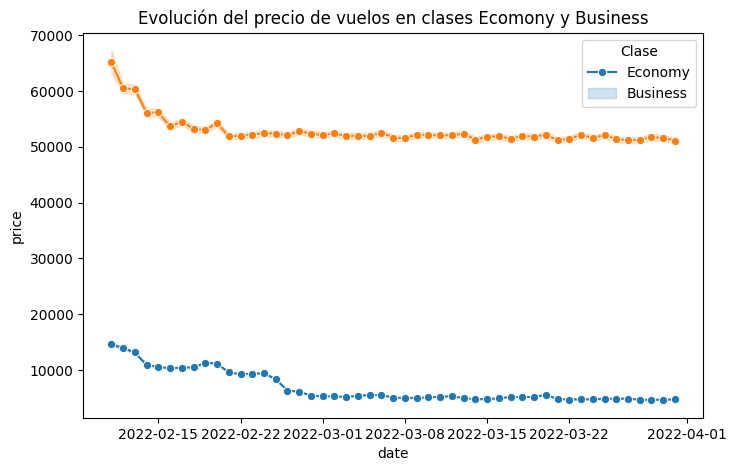

In [127]:
# Gráfico de la evolución del precio de vuelos en clases Economy y Business
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='date', y='price', hue='clase', marker='o')
plt.title('Evolución del precio de vuelos en clases Ecomony y Business')
plt.legend(title='Clase', labels=['Economy', 'Business'])
plt.show()

### 🔍 Distribución de los precios según la clase

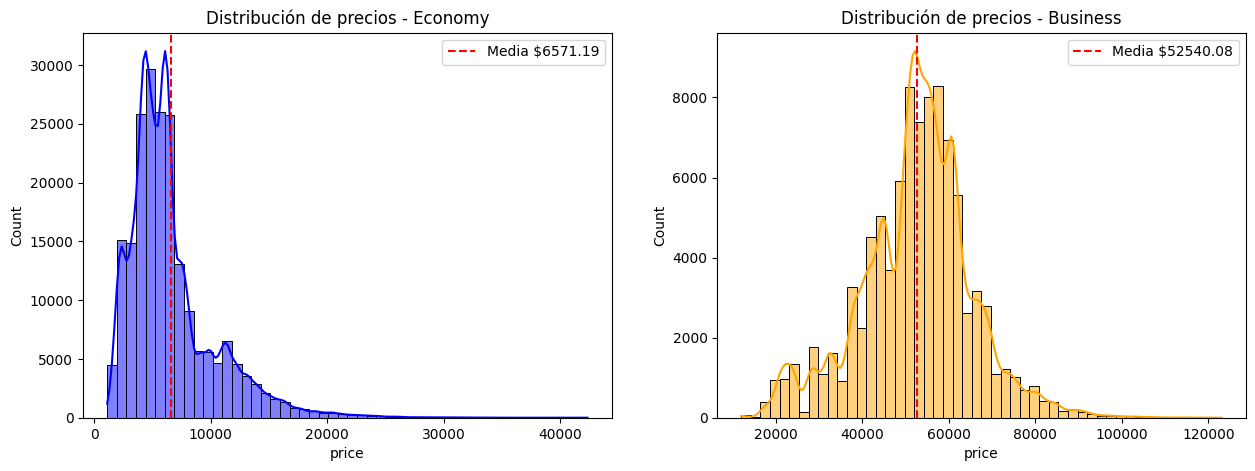

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df[df['clase'] == 0], x='price', bins=50, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Distribución de precios - Economy')
axs[0].axvline(df[ df['clase'] == 0]['price'].mean(), color='red', linestyle='--', label=f'Media ${df[ df['clase'] == 0]['price'].mean():.2f}')
axs[0].legend()

sns.histplot(data=df[df['clase'] == 1], x='price', bins=50, kde=True, ax=axs[1], color='orange')
axs[1].set_title('Distribución de precios - Business')
axs[1].axvline(df[ df['clase'] == 1]['price'].mean(), color='red', linestyle='--', label=f'Media ${df[ df['clase'] == 1]['price'].mean():.2f}')
axs[1].legend()
plt.show()

En estos gráficos se aprecia que, como se esperaba, la cantidad máxima de vuelos por cada rango (bin) en la clase *Business* es a lo sumo 8000, mientras que en la clase *Economy* llegan casi a los 30.000.

También se puede advertir una distribución muy cercana a normal para *Business* mientras que para *Economy* presenta un sesgo a la derecha, es decir, una cola larga a la derecha indicando que algunos vuelos de esta clase llegan a los niveles de precio existentes en la clase *Business*, aunque son muy pocos.

### 🔍 Datos atípicos de los precios según la clase

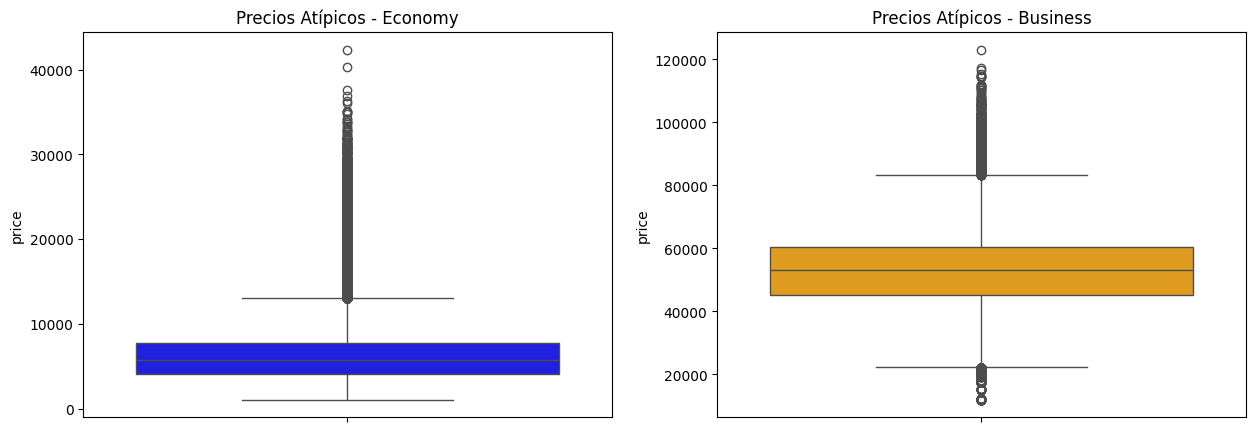

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df[df['clase'] == 0]['price'], ax=axs[0], color='blue')
axs[0].set_title('Precios Atípicos - Economy')

sns.boxplot(data=df[df['clase'] == 1]['price'],ax=axs[1], color='orange')
axs[1].set_title('Precios Atípicos - Business')
plt.show()

### 🔍 Comparación de los precios ofrecidos por las aerolíneas 

In [130]:
# Se crea un nuevo dataframe agrupando por ruta, aerolínea y clase, y calculando el precio promedio
dfRutas = df.groupby(['ruta','airline','clase'])['price'].mean().reset_index().sort_values(by='price', ascending=False)
dfRutas.head()

,ruta,airline,clase,price
113,Delhi_Kolkata,Vistara,1,63469.766341
202,Kolkata_Mumbai,Vistara,1,62888.326139
242,Mumbai_Kolkata,Vistara,1,62525.265255
186,Kolkata_Delhi,Vistara,1,62403.943267
41,Bangalore_Mumbai,Vistara,1,61452.101869


> **Precios para Clase Economy**

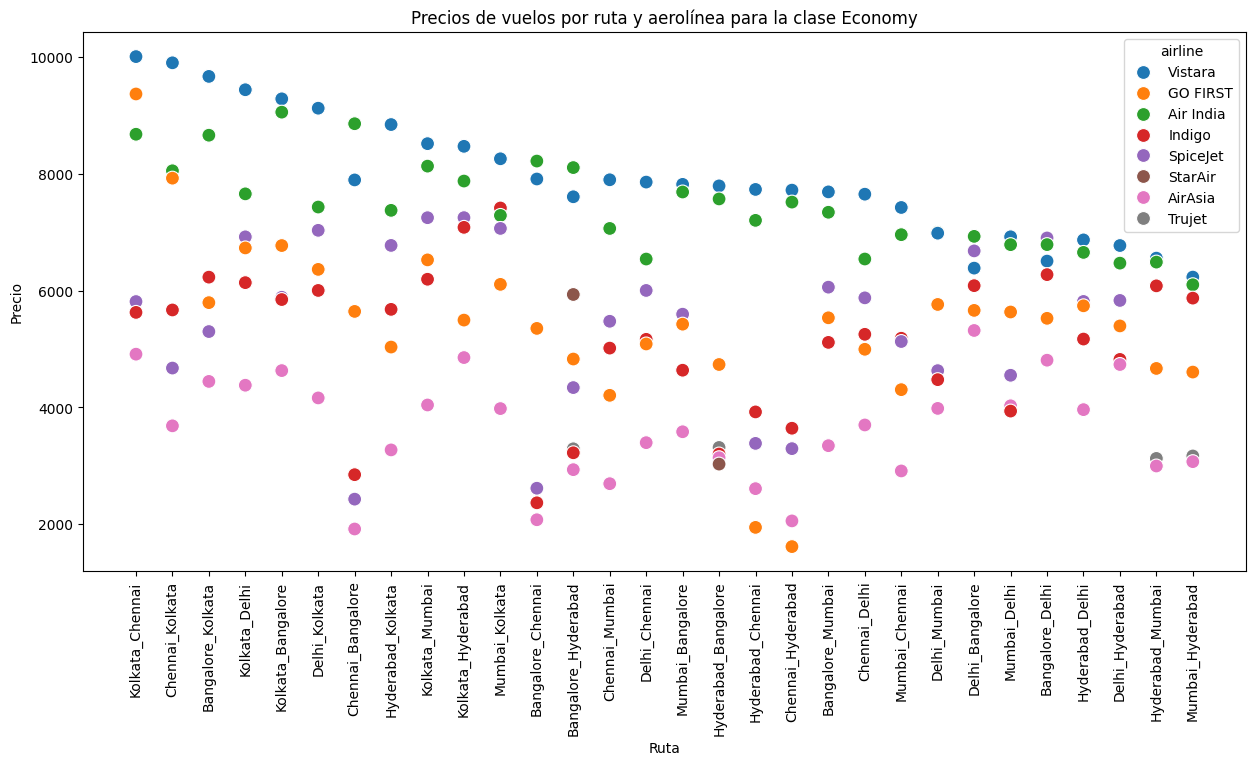

In [131]:
# Gráfica de los precios de los vuelos para las rutas según la aerolínea (Clase Económica)
plt.figure(figsize=(15, 7))
sns.scatterplot(data=dfRutas[dfRutas['clase']==0], x='ruta', y='price', hue='airline', s=100)
plt.title('Precios de vuelos por ruta y aerolínea para la clase Economy')
plt.xticks(rotation=90)
plt.xlabel('Ruta')
plt.ylabel('Precio')
plt.show()

De este gráfico se pueden inferir varios conocimientos, como:

* Hay muchas aerolíneas que ofrecen tarifas de clase Economy
* Las 3 aerolíneas más costosas, aún para esta clase, son sin lugar a dudas *Vistara, Air India y GO FIRST*
* Se observa una curva descendente en general hacia el lado derecho, lo que indica que las rutas del lado izquierdo son las más costosas, lo que nos hace inferir que las ciudades origen y destino de éstas están más alejadas que las de las rutas del lado derecho.
* El primer tercio de las rutas mostradas incluyen una ciudad llamada *Kolkata*, así que si está en las rutas más costosas indica que es la ciudad más alejada de las demás incluidas en el dataset.
* La aerolínea más económica de todas parece ser *AirAsia*

> **Precios para Clase Business**

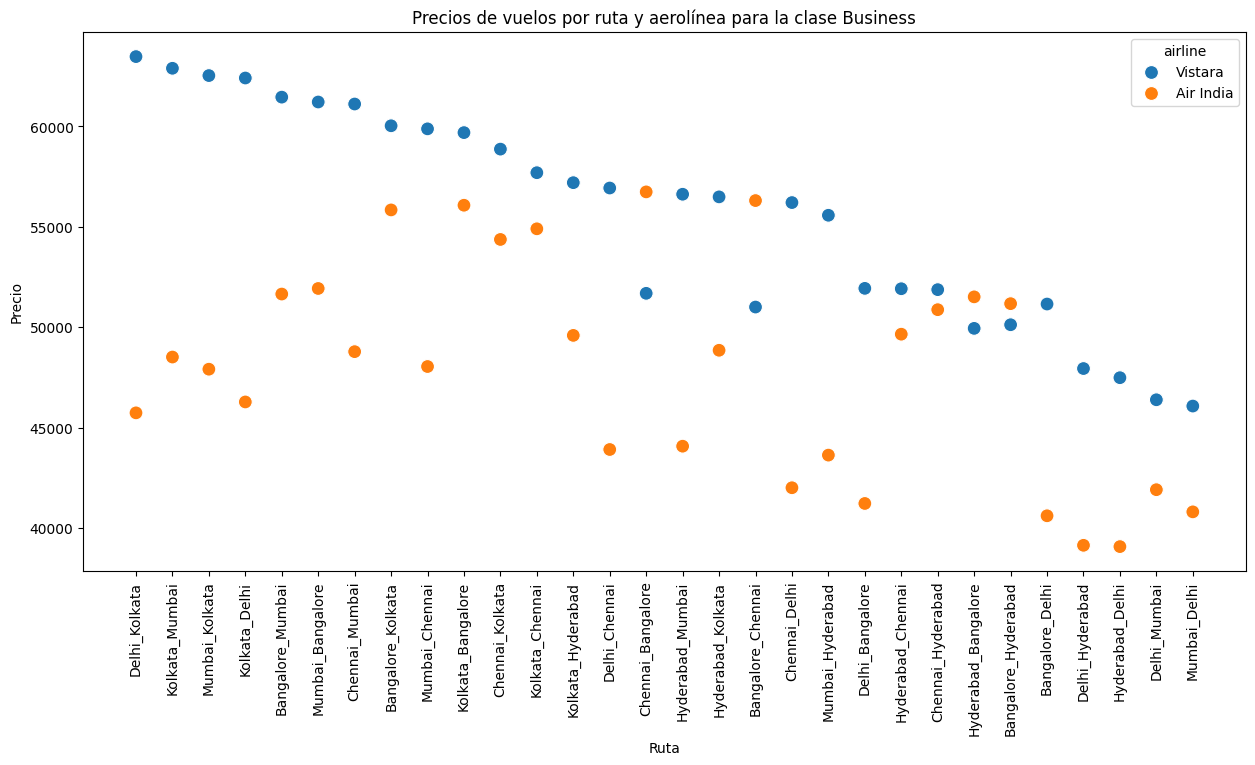

In [132]:
# Gráfica de los precios de los vuelos para las rutas según la aerolínea (Clase Negocios)
plt.figure(figsize=(15, 7))
sns.scatterplot(data=dfRutas[dfRutas['clase']==1], x='ruta', y='price', hue='airline', s=100)
plt.title('Precios de vuelos por ruta y aerolínea para la clase Business')
plt.xticks(rotation=90)
plt.xlabel('Ruta')
plt.ylabel('Precio')
plt.show()

En este gráfico podemos entender:

* Solo 2 aerolineas ofrecen la clase Business
* Las 2 aerolíneas están en el el grupo de las más costosas, inferido en el gráfico anterior, y en general **Vistara** es la más costosa de todas.
* En éste también se encuentra una curva descendente a la derecha, indicando que las rutas más costosas están a la izquierda
* Como consecuencia de los anterior, la distancia entre Delhi-Kolkata es mayor que entre Delhi-Mumbai. (Se investiga y confirma; Delhi-Kolkata: 1305 km, Delhi-Mumbai: 1153 Km)

### 🔍 Comparación de los precios entre semana contra los de fín de semana

In [133]:
# Se crea un nuevo dataframe agrupando por aerolínea, clase y fin-de-semana, calculando el precio promedio
dfDias = df.groupby(['airline','clase','weekend'])['price'].mean().reset_index().sort_values(by=['airline','clase','weekend'], ascending=[False,False,False])
dfDias

,airline,clase,weekend,price
19,Vistara,1,1,56372.744215
18,Vistara,1,0,55137.919113
17,Vistara,0,1,8210.429281
16,Vistara,0,0,7653.614799
15,Trujet,0,1,3386.133333
14,Trujet,0,0,3163.000000
13,StarAir,0,1,4882.238095
12,StarAir,0,0,4959.125000
11,SpiceJet,0,1,6521.058484
10,SpiceJet,0,0,6040.744074


> Clase Business

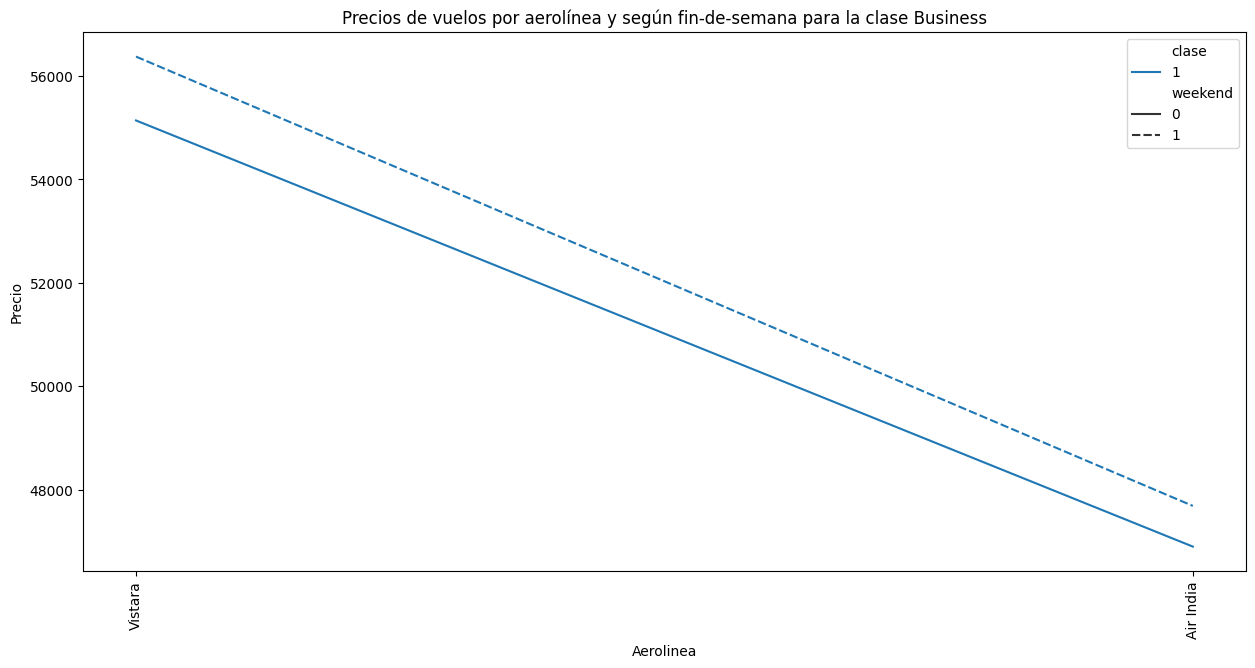

In [134]:
# Gráfica de los precios de los vuelos para las aerolíneas según si es o no fin-de-semana (Clase Negocios)
plt.figure(figsize=(15, 7))
sns.lineplot(data=dfDias[dfDias['clase']==1], x='airline', y='price', hue='clase', style='weekend')
plt.title('Precios de vuelos por aerolínea y según fin-de-semana para la clase Business')
plt.xticks(rotation=90)
plt.xlabel('Aerolinea')
plt.ylabel('Precio')
plt.show()

> Clase Economy

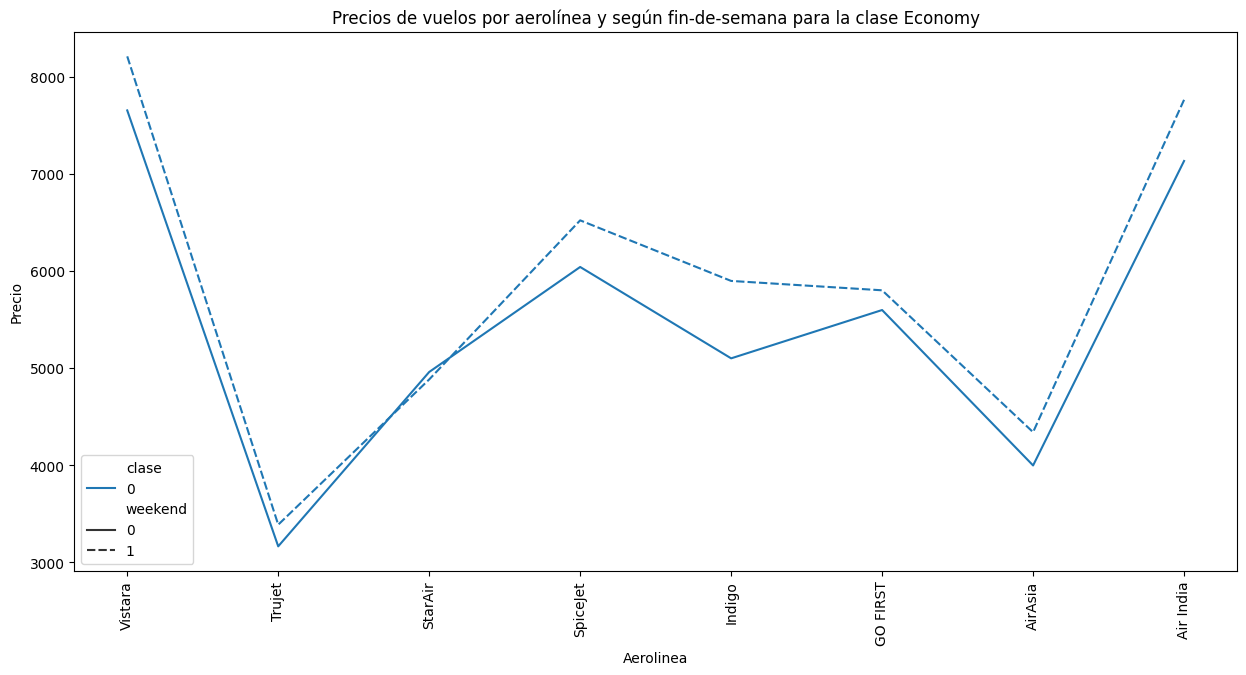

In [135]:
# Gráfica de los precios de los vuelos para las aerolíneas según si es o no fin-de-semana (Clase Económica)
plt.figure(figsize=(15, 7))
sns.lineplot(data=dfDias[dfDias['clase']==0], x='airline', y='price', hue='clase', style='weekend')
plt.title('Precios de vuelos por aerolínea y según fin-de-semana para la clase Economy')
plt.xticks(rotation=90)
plt.xlabel('Aerolinea')
plt.ylabel('Precio')
plt.show()

Se concluye que, tanto en clase económica como empresarial, los precios de los tiquetes se elevan cuando el día del vuelo cae en fin de semana (sab, Dom), pues en ambos gráficos se observa siempre la línea punteada por encima de la línea continua, a excepción de la aerolínea *StaAir* cuyo precio parece mantenerse.

### 🔍 Comparación de los precios por la hora del vuelo

Para hacer este análisis se dividirán las horas del día en 4 franjas:

* Amanecer, de las 00:00 a las 05:59
* Mañana,   de las 06:00 a las 11:59
* Tarde,    de las 12:00 a las 17:59
* Noche,    de las 18:00 a las 23:59

In [136]:
df['franja_horaria'] = pd.cut(df['dep_time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Amanecer', 'Mañana', 'Tarde', 'Noche'], right=False)
df.head(10)

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,price,ruta,weekend,franja_horaria
0,2022-02-11,SpiceJet,8709,1900-01-01 18:55:00,Delhi,1900-01-01 21:05:00,Mumbai,0,130.0,non-stop,5953,Delhi_Mumbai,0,Noche
1,2022-02-11,SpiceJet,8157,1900-01-01 06:20:00,Delhi,1900-01-01 08:40:00,Mumbai,0,140.0,non-stop,5953,Delhi_Mumbai,0,Mañana
2,2022-02-11,AirAsia,764,1900-01-01 04:25:00,Delhi,1900-01-01 06:35:00,Mumbai,0,130.0,non-stop,5956,Delhi_Mumbai,0,Amanecer
3,2022-02-11,Vistara,995,1900-01-01 10:20:00,Delhi,1900-01-01 12:35:00,Mumbai,0,135.0,non-stop,5955,Delhi_Mumbai,0,Mañana
4,2022-02-11,Vistara,963,1900-01-01 08:50:00,Delhi,1900-01-01 11:10:00,Mumbai,0,140.0,non-stop,5955,Delhi_Mumbai,0,Mañana
5,2022-02-11,Vistara,945,1900-01-01 11:40:00,Delhi,1900-01-01 14:00:00,Mumbai,0,140.0,non-stop,5955,Delhi_Mumbai,0,Mañana
6,2022-02-11,Vistara,927,1900-01-01 09:30:00,Delhi,1900-01-01 11:35:00,Mumbai,0,125.0,non-stop,6060,Delhi_Mumbai,0,Mañana
7,2022-02-11,Vistara,951,1900-01-01 14:20:00,Delhi,1900-01-01 16:30:00,Mumbai,0,130.0,non-stop,6060,Delhi_Mumbai,0,Tarde
8,2022-02-11,GO FIRST,334,1900-01-01 08:00:00,Delhi,1900-01-01 10:10:00,Mumbai,0,130.0,non-stop,5954,Delhi_Mumbai,0,Mañana
9,2022-02-11,GO FIRST,336,1900-01-01 14:20:00,Delhi,1900-01-01 16:35:00,Mumbai,0,135.0,non-stop,5954,Delhi_Mumbai,0,Tarde


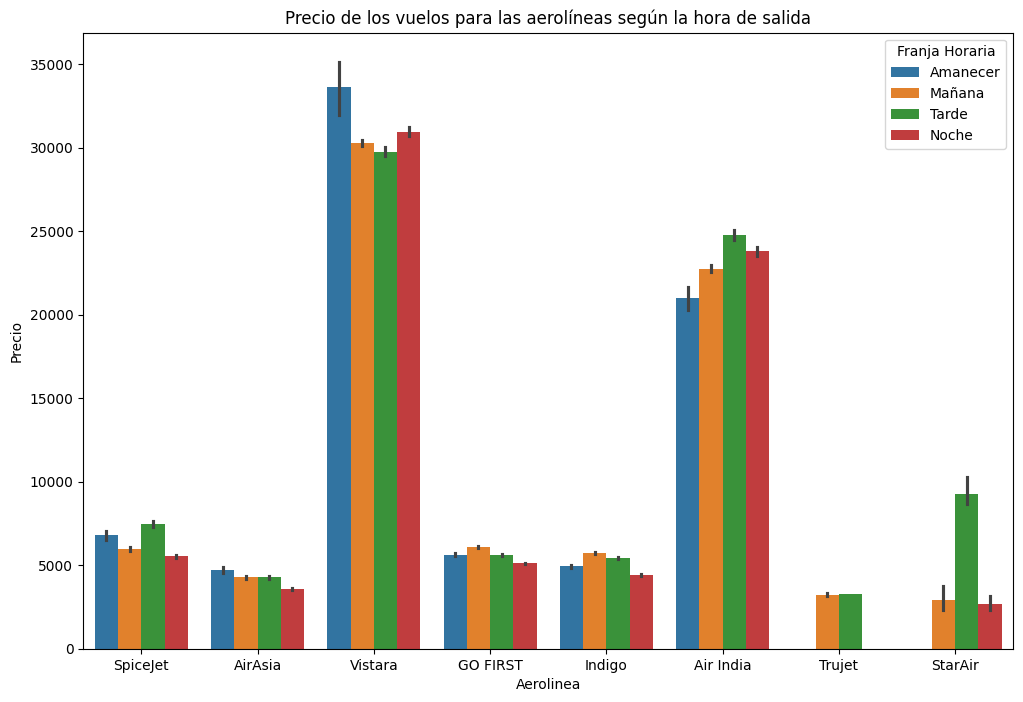

In [137]:
# Gráfico de los Precio de los vuelos para las aerolíneas según la hora de salida
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='airline', y='price', hue='franja_horaria')
plt.title('Precio de los vuelos para las aerolíneas según la hora de salida')
plt.legend(title='Franja Horaria')
plt.xlabel('Aerolinea')
plt.ylabel('Precio')
plt.show()

Se evidencia que este análisiss por las franjas horarias según la hora de salida de los vuelos NO es concluyente, pues cada aerolína establece los precios más altos en diferentes franjas horarias, lo que implica que no hay un patrón al respecto.

### **<font color = 'lightgreen'>5.   Análisis de correlaciones</font>**

Se realiza un análisis de correlaciones entre las diferentes variables existentes, identificando cuáles son las variables más importantes para la predicción de la
variable objetivo.


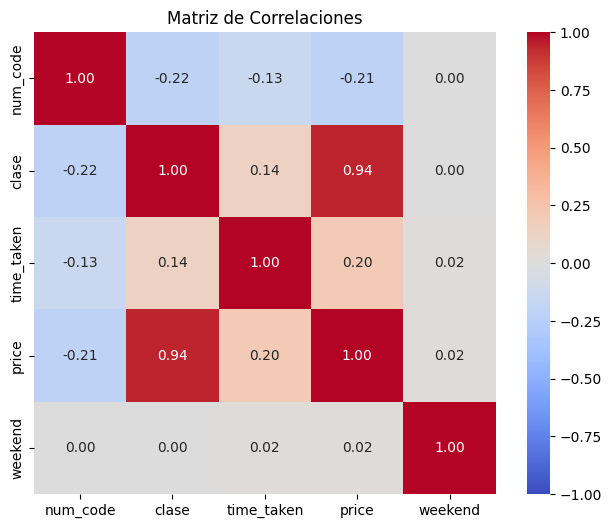

In [138]:
# Se crea la matriz de correlaciones y se grafica
corr_matrix = df.corr(numeric_only=True, method="pearson")
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Matriz de Correlaciones')
plt.show()

> Sólo se encuentra a priori una correlación importante, entre el precio y la clase, la cual es una relación positiva muy fuerte.  Esta relación se debe a que obviamente los precios de la clase 0 son bastante mas pequeños que los de la clase 1.

### 🔍 Correlación entre el precio y el tiempo total del vuelo

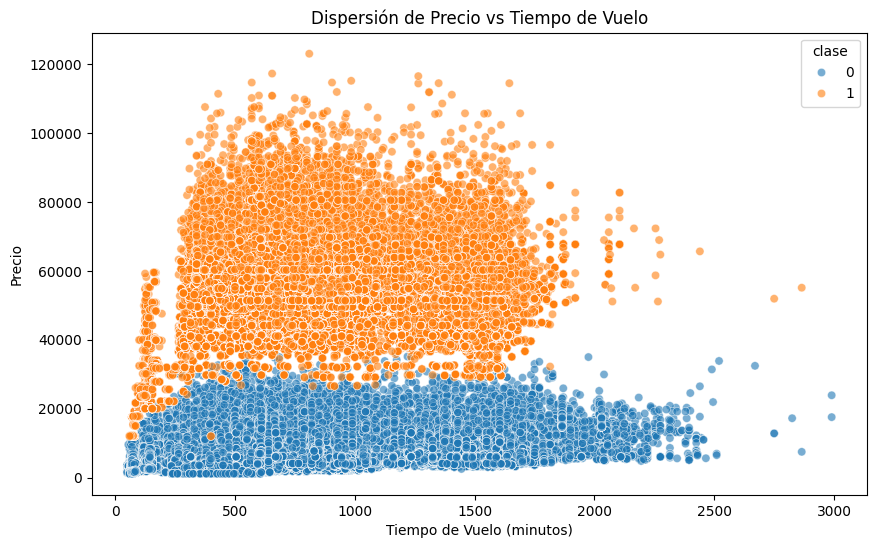

In [139]:
# Gráfico de dispersión de precio vs tiempo de vuelo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='time_taken', y='price', hue='clase', alpha=0.6)
plt.title('Dispersión de Precio vs Tiempo de Vuelo')
plt.xlabel('Tiempo de Vuelo (minutos)')
plt.ylabel('Precio')
plt.show()

> No se observa una relación clara entre estas dos variables, pues para ambas clases se observan vuelos costosos tanto en vuelos cortos como en largos.

### **<font color = 'lightgreen'>6.   Transformaciones necesarias</font>**

En este punto se realizan las transformaciones necesarias para ejecutar el modelamiento posterior.



Se planea crear 3 modelos de ML para intentar hacer predicciones sobre el precio de los vuelos, pero uno de ellos (CatBoost) no necesita codificación de las variables porque está hecho para variables categóricas, así que se creará una copia del dataframe original para este modelo y luego se codificará el original para pasar a los otros dos modelos que sí necesitan codificación.

In [140]:
dfCatBoost = df.copy()

A continuación se codificarán las variables que lo necesitan directamente sobre el dataframe original.

#### > Análisis de Variable: **airline**

In [141]:
df["airline"].value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

Esta variable presenta 8 categorías, que es una cantidad manejable, y se observa que hay 2 de ellas que dominan el mercado mientras hay otras 2 que son bastante raras, pues entre las 2 apenas sobrepasan los 100 vuelos de los más de 300 mil que tiene el dataset.

La codificación que se decide hacer y conservaría la rareza de las 2 últimas, es **frequency encoding**, en la cual se reemplaza cada valor por la frecuencia de aparición de su valor.

In [142]:
# Aplicar frequency encoding a la variable airline

# Primero se crea una serie con las frecuencias de cada categoría, la opción normalize=True devuelve las frecuencias relativas
freq = df["airline"].value_counts(normalize=True)
freq

airline
Vistara      0.425826
Air India    0.269412
Indigo       0.143608
GO FIRST     0.077190
AirAsia      0.053613
SpiceJet     0.030011
StarAir      0.000203
Trujet       0.000137
Name: proportion, dtype: float64

In [143]:
# Luego se mapea la variable original con las frecuencias
df["airline"] = df["airline"].map(freq)
df.head()

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,price,ruta,weekend,franja_horaria
0,2022-02-11,0.030011,8709,1900-01-01 18:55:00,Delhi,1900-01-01 21:05:00,Mumbai,0,130.0,non-stop,5953,Delhi_Mumbai,0,Noche
1,2022-02-11,0.030011,8157,1900-01-01 06:20:00,Delhi,1900-01-01 08:40:00,Mumbai,0,140.0,non-stop,5953,Delhi_Mumbai,0,Mañana
2,2022-02-11,0.053613,764,1900-01-01 04:25:00,Delhi,1900-01-01 06:35:00,Mumbai,0,130.0,non-stop,5956,Delhi_Mumbai,0,Amanecer
3,2022-02-11,0.425826,995,1900-01-01 10:20:00,Delhi,1900-01-01 12:35:00,Mumbai,0,135.0,non-stop,5955,Delhi_Mumbai,0,Mañana
4,2022-02-11,0.425826,963,1900-01-01 08:50:00,Delhi,1900-01-01 11:10:00,Mumbai,0,140.0,non-stop,5955,Delhi_Mumbai,0,Mañana


#### > Análisis de las Variables: **from** y **to**

In [144]:
df['from'].value_counts()

from
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

In [145]:
df['to'].value_counts()

to
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

Para estas dos variables se usará el mismo criterio que para 'airline', ya que son incluso menos categorías, así que se codificarán usando *frequency encoding*

In [146]:
# Primero se crean las series con las frecuencias de las categorías de cada variable
freq_from = df["from"].value_counts(normalize=True)
freq_to = df["to"].value_counts(normalize=True)
freq_from

from
Delhi        0.204306
Mumbai       0.202834
Bangalore    0.173536
Kolkata      0.154356
Hyderabad    0.136082
Chennai      0.128888
Name: proportion, dtype: float64

In [147]:
freq_to

to
Mumbai       0.196859
Delhi        0.191037
Bangalore    0.170225
Kolkata      0.164973
Hyderabad    0.142463
Chennai      0.134443
Name: proportion, dtype: float64

In [148]:
# Finalmente se mapean las variables originales con las frecuencias
df["from"] = df["from"].map(freq_from)
df["to"] = df["to"].map(freq_to)
df.head()

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,price,ruta,weekend,franja_horaria
0,2022-02-11,0.030011,8709,1900-01-01 18:55:00,0.204306,1900-01-01 21:05:00,0.196859,0,130.0,non-stop,5953,Delhi_Mumbai,0,Noche
1,2022-02-11,0.030011,8157,1900-01-01 06:20:00,0.204306,1900-01-01 08:40:00,0.196859,0,140.0,non-stop,5953,Delhi_Mumbai,0,Mañana
2,2022-02-11,0.053613,764,1900-01-01 04:25:00,0.204306,1900-01-01 06:35:00,0.196859,0,130.0,non-stop,5956,Delhi_Mumbai,0,Amanecer
3,2022-02-11,0.425826,995,1900-01-01 10:20:00,0.204306,1900-01-01 12:35:00,0.196859,0,135.0,non-stop,5955,Delhi_Mumbai,0,Mañana
4,2022-02-11,0.425826,963,1900-01-01 08:50:00,0.204306,1900-01-01 11:10:00,0.196859,0,140.0,non-stop,5955,Delhi_Mumbai,0,Mañana


#### > Análisis de la Variable: **franja_horaria**

Esta variable fue creada durante este análisis, y contiene solo 4 valores, así que se codificará usando un *Ordinal encoding* dada la naturaleza cronológica que estos datos tienen.

In [149]:
# Se codifica la variable franja_horaria usando Ordinal encoding
orden = {'Amanecer': 0, 'Mañana': 1, 'Tarde': 2, 'Noche': 3}
df['franja_horaria'] = df['franja_horaria'].map(orden)
df.head()

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,price,ruta,weekend,franja_horaria
0,2022-02-11,0.030011,8709,1900-01-01 18:55:00,0.204306,1900-01-01 21:05:00,0.196859,0,130.0,non-stop,5953,Delhi_Mumbai,0,3
1,2022-02-11,0.030011,8157,1900-01-01 06:20:00,0.204306,1900-01-01 08:40:00,0.196859,0,140.0,non-stop,5953,Delhi_Mumbai,0,1
2,2022-02-11,0.053613,764,1900-01-01 04:25:00,0.204306,1900-01-01 06:35:00,0.196859,0,130.0,non-stop,5956,Delhi_Mumbai,0,0
3,2022-02-11,0.425826,995,1900-01-01 10:20:00,0.204306,1900-01-01 12:35:00,0.196859,0,135.0,non-stop,5955,Delhi_Mumbai,0,1
4,2022-02-11,0.425826,963,1900-01-01 08:50:00,0.204306,1900-01-01 11:10:00,0.196859,0,140.0,non-stop,5955,Delhi_Mumbai,0,1


### **<font color = 'lightgreen'>7.   Elección de modelos</font>**

En este paso se eligen 3 modelos como candidatos para resolver el problema, y a partir de esto se generan los conjuntos de entrenamiento y prueba para luego entrenar los diferentes modelos.


> Se definen los modelos: **Random forest, XGBoost y CatBoost**

> Se definen primero las variables objetivo y predictorias, y se divide el dataset entre entrenamiento y prueba

In [150]:
# ---------------------------------------------
# <1> Separar variables predictoras y objetivo
# ---------------------------------------------
X = df.drop(columns='price', axis=1)
X = X.select_dtypes(include=["int64", "float64"])
y = df['price']

# ---------------------------------------------
# <2> División 80% entrenamiento, 20% test
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

> Se hace el escalado de las variables

In [151]:
from sklearn.preprocessing import StandardScaler

scaler          = StandardScaler()

# ---------------------------------------------
# <3> Ajustar con train y transformar
# ---------------------------------------------
X_train_scaled  = scaler.fit_transform(X_train)

# ---------------------------------------------
# <4> Transformar test con los mismos parámetros
# ---------------------------------------------
X_test_scaled   = scaler.transform(X_test)

### 🤖 **7.1 Random forest**

In [152]:
# ---------------------------------------------
# <5> Se crea y ajusta el modelo Random Forest
# ---------------------------------------------

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_reg = RandomForestRegressor(n_estimators=200, random_state=18, n_jobs=-1)
rf_reg.fit(X_train_scaled, y_train)



RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=18)

In [153]:
# ---------------------------------------------
# <6> Se predice y evalúa el modelo Random Forest
# ---------------------------------------------

y_pred_rf = rf_reg.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

MSE: 12978478.188689541
R²: 0.9747874898368247
MAE: 2200.9877442794427


### 🤖 **7.2 XGBoost**

In [154]:
# ---------------------------------------------
# <5> Se crea y ajusta el modelo XGBoost
# ---------------------------------------------
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=18,
    n_jobs=-1
)

xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [155]:
# ---------------------------------------------
# <6> Se predice y evalúa el modelo XGBoost
# ---------------------------------------------
y_pred_xgb = xgb_reg.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))

MSE: 16948236.0
R²: 0.9670757055282593
MAE: 2733.69677734375


### 🤖 **7.3 CatBoost**

Como este modelo puede recibir variables categóricas, se debe hacer de nuevo la división entre el dataset de entrenamiento y prueba pero basado en el Dataframe que se sacó de copia antes de hacer las codificaciones. (dfCatBoost)

In [156]:
# Se hace de nuevo la división entre el dataset de entrenamiento y prueba pero basado en el Dataframe que se sacó de copia antes de hacer las codificaciones. (dfCatBoost)
from catboost import CatBoostRegressor

# ---------------------------------------------
# <1> Separar variables predictoras y objetivo
# ---------------------------------------------
X_cat = dfCatBoost.drop(columns='price', axis=1)
y_cat = dfCatBoost['price']

# ---------------------------------------------
# <2> División 80% entrenamiento, 20% test
# ---------------------------------------------
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=18)

In [157]:
# ---------------------------------------------
# <3> Se crea y ajusta el modelo CatBoost
# ---------------------------------------------
categorical_features = ["airline","from", "to","stop", "ruta", "franja_horaria"] # Lista de las variables categóricas

cat_reg = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function="RMSE",
    random_seed=18,
    verbose=100
)

cat_reg.fit(
    X_train_cat, y_train_cat,
    cat_features=categorical_features,
    eval_set=(X_test_cat, y_test_cat),
    use_best_model=True
)

0:	learn: 20595.2912705	test: 20589.5996821	best: 20589.5996821 (0)	total: 179ms	remaining: 1m 29s
100:	learn: 4086.5831527	test: 4073.9934075	best: 4073.9934075 (100)	total: 18s	remaining: 1m 10s
200:	learn: 3641.2973415	test: 3634.4879063	best: 3634.4879063 (200)	total: 36.2s	remaining: 53.8s
300:	learn: 3404.0720033	test: 3406.8806627	best: 3406.8806627 (300)	total: 54.3s	remaining: 35.9s
400:	learn: 3245.2989831	test: 3254.2896255	best: 3254.2896255 (400)	total: 1m 13s	remaining: 18s
499:	learn: 3123.1752422	test: 3139.9638119	best: 3139.9638119 (499)	total: 1m 31s	remaining: 0us

bestTest = 3139.963812
bestIteration = 499



In [158]:
# ---------------------------------------------
# <4> Se predice y evalúa el modelo
# ---------------------------------------------
y_pred_cat = cat_reg.predict(X_test_cat)

print("MSE:", mean_squared_error(y_test, y_pred_cat))
print("R²:", r2_score(y_test, y_pred_cat))
print("MAE:", mean_absolute_error(y_test, y_pred_cat))

MSE: 9859372.740056805
R²: 0.9808467886760525
MAE: 1788.8265769778502


### **<font color = 'lightgreen'>8.   Métricas de evaluación</font>**

Se definen 3 métricas para evaluar los modelos entrenados, y se generan gráficos de comparación. 

### **Comparación de Resultados**

Se definen como métodos de evaluación para los modelos las métricas: ***MSE, R² y MAE***

In [159]:
dfComparacion = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost', 'CatBoost'],
    'MSE': [mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb), mean_squared_error(y_test, y_pred_cat)],
    'R²': [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, y_pred_cat)],
    'MAE': [mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_test, y_pred_cat)]
})
dfComparacion

,Modelo,MSE,R²,MAE
0,Random Forest,1.297848e+07,0.974787,2200.987744
1,XGBoost,1.694824e+07,0.967076,2733.696777
2,CatBoost,9.859373e+06,0.980847,1788.826577


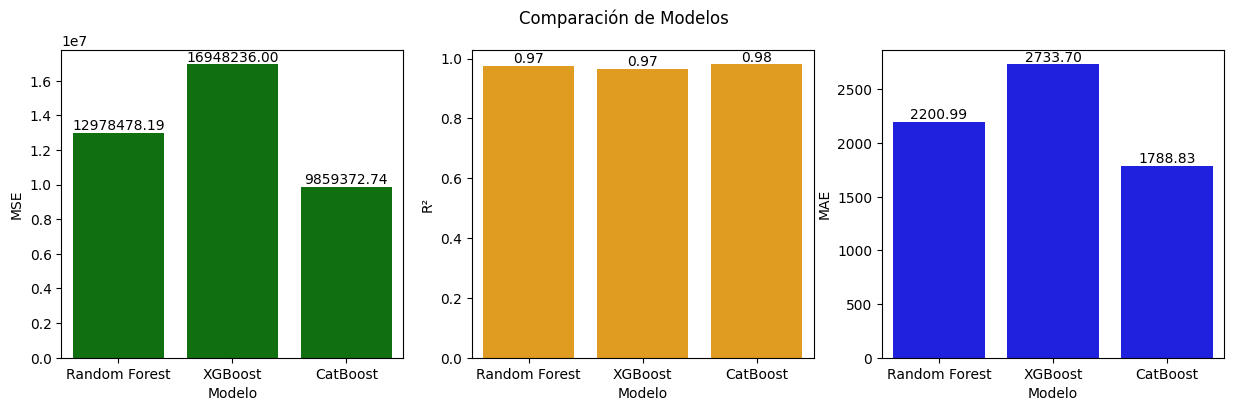

In [160]:
# Gráfica de la comparación de los modelos
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=dfComparacion, x='Modelo', y='MSE',ax=axs[0], color='green')
sns.barplot(data=dfComparacion, x='Modelo', y='R²',ax=axs[1], color='orange')
sns.barplot(data=dfComparacion, x='Modelo', y='MAE',ax=axs[2], color='blue')
plt.suptitle('Comparación de Modelos')
# Agregar etiquetas de valores
axs[0].bar_label(axs[0].containers[0], fmt="%.2f")  
axs[1].bar_label(axs[1].containers[0], fmt="%.2f") 
axs[2].bar_label(axs[2].containers[0], fmt="%.2f") 
plt.show()

###  🏅 **Conclusión de las Comparaciones**

> El mejor modelo para este ejercicio de predicción fue **CatBoost**, que aunque en la métrica de Pearson (R²) gana apenas por una centésima, la diferencia en el error cuadrático medio es muy amplia al igual que en rl error absoluto medio, teniendo en ambas métricas el menor de los errores.

---

### **<font color = 'lightgreen'>9.   Grilla de hiperparametros</font>**

Para cada uno de los modelos se elige una grilla de hiperparametros y se intenta optimizarlos buscando la mejor combinación para cada grilla. 


> Primero se definen las grillas con los hiperparámetros por cada modelo:

In [178]:
# Definición de grillas de hiperparámetros para cada modelo
param_grid_rf = {
    "n_estimators": [20, 35],         # número de árboles
    "max_depth": [None, 5, 8],         # profundidad máxima
    "min_samples_split": [2, 5],         # mínimo para dividir un nodo
    "min_samples_leaf": [1, 2],           # mínimo de muestras en una hoja
    "max_features": ["sqrt", "log2", None],  # número de features consideradas en cada split
    "bootstrap": [True, False]               # muestreo con o sin reemplazo
}

param_grid_xgb = {
    "n_estimators": [20, 35],
    "learning_rate": [0.01, 0.05],
    "max_depth": [ 5, 8],
    "subsample": [0.2, 0.4],        # proporción de datos por árbol
    "colsample_bytree": [0.5, 0.7], # proporción de features por árbol
    "gamma": [0, 2],                  # regularización para splits
    "reg_lambda": [1, 2],            # L2 regularization
    "reg_alpha": [ 0.1, 0.5]             # L1 regularization
}

param_grid_cat = {
    "iterations": [20, 35],   # número de árboles
    "learning_rate": [0.01, 0.05],
    "depth": [5, 8],           # profundidad del árbol
    "l2_leaf_reg": [1, 3],   # regularización
    "bagging_temperature": [0, 0.5], # control de muestreo aleatorio
    "border_count": [30, 50]     # número de bins para features numéricas
}


> A continuación se ejecuta la búsqueda con grilla de hiperparámetros para cada modelo

In [164]:
# Importar las bibliotecas necesarias para la búsqueda en grillas
from sklearn.model_selection import GridSearchCV

# =====================
# 1. RANDOM FOREST
# =====================

rf = RandomForestRegressor(random_state=18)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
grid_rf.fit(X_train_scaled, y_train)

print("Mejor modelo RF:", grid_rf.best_params_)
print("Mejor score RF (MSE):", -grid_rf.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Mejor modelo RF: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 35}
Mejor score RF (MSE): 13060749.823266985


In [170]:
# =====================
# 2. XGBOOST
# =====================

xgb = XGBRegressor(random_state=18, eval_metric="rmse")
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
grid_xgb.fit(X_train_scaled, y_train)

print("Mejor modelo XGB:", grid_xgb.best_params_)
print("Mejor score XGB (MSE):", -grid_xgb.best_score_)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Mejor modelo XGB: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 35, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.4}
Mejor score XGB (MSE): 52791384.0


In [179]:
# =====================
# 3. CATBOOST
# =====================

cat = CatBoostRegressor(verbose=0, random_state=18)
grid_cat = GridSearchCV(cat, param_grid_cat, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
grid_cat.fit(X_train_cat, y_train_cat, cat_features=categorical_features)

print("Mejor modelo CAT:", grid_cat.best_params_)
print("Mejor score CAT (MSE):", -grid_cat.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mejor modelo CAT: {'bagging_temperature': 0, 'border_count': 50, 'depth': 8, 'iterations': 35, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
Mejor score CAT (MSE): 42810250.11877138


In [180]:
# =====================
# 4. Comparar resultados
# =====================
results = pd.DataFrame({
    "Modelo": ["RandomForest", "XGBoost", "CatBoost"],
    "Best Score (CV)": [
        np.sqrt(-grid_rf.best_score_),
        np.sqrt(-grid_xgb.best_score_),
        np.sqrt(-grid_cat.best_score_)
    ]
})

results

,Modelo,Best Score (CV)
0,RandomForest,3613.965941
1,XGBoost,7265.767957
2,CatBoost,6542.954235


### **<font color = 'lightgreen'>10.   Predicción de Precios</font>**

Finalmente, se realizan algunas predicciones de precios de vuelos usando para esto el modelo que mejor desempeño haya demostrado en las comparaciones hechas antes.

En la parte inicial el modelo que mejor desempeño demostró fue **CatBoost**, y aunque en la segunda parte fue el segundo mejor, fue tal vez debido a una débil optimización, así que se decide hacer las predicciones usando este modelo.


### 10.1 Creación de datos de prueba para hacer predicciones


In [189]:
test_data = pd.DataFrame({
    'date': ['2023-12-25', '2023-12-26', '2023-12-27'],
    'airline': ['Vistara', 'Air India', 'SpiceJet'],
    'num_code': [1, 2, 3],
    'dep_time': ['10:00:00', '14:00:00', '18:00:00'],
    'from': ['Delhi', 'Mumbai', 'Kolkata'],
    'arr_time': ['12:00:00', '16:30:00', '20:15:00'],
    'to': ['Mumbai', 'Kolkata', 'Delhi'],
    'clase': [1, 0, 0],  # 1=Business, 0=Economy
    'time_taken': [150, 135, 120],  # en minutos
    'stop': ['non-stop', '1-stop', '2+-stop'],
})

### 10.2 Procesar las columnas para que queden igual al modelo entrenado


In [190]:
# Procesar las columnas de fecha y hora como en el dataset original
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['dep_time'] = pd.to_datetime(test_data['dep_time'], format='%H:%M:%S')
test_data['arr_time'] = pd.to_datetime(test_data['arr_time'], format='%H:%M:%S')

# Agregar las columnas calculadas que usamos en el modelo
test_data['ruta'] = test_data['from'] + '_' + test_data['to']
test_data['weekend'] = test_data['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
test_data['franja_horaria'] = pd.cut(test_data['dep_time'].dt.hour, 
                                    bins=[0, 6, 12, 18, 24], 
                                    labels=['Amanecer', 'Mañana', 'Tarde', 'Noche'], 
                                    right=False)

In [200]:
# Se visualiza el dataset de prueba
test_data

,date,airline,num_code,dep_time,from,arr_time,to,clase,time_taken,stop,ruta,weekend,franja_horaria
0,2023-12-25,Vistara,1,1900-01-01 10:00:00,Delhi,1900-01-01 12:00:00,Mumbai,1,150,non-stop,Delhi_Mumbai,0,Mañana
1,2023-12-26,Air India,2,1900-01-01 14:00:00,Mumbai,1900-01-01 16:30:00,Kolkata,0,135,1-stop,Mumbai_Kolkata,0,Tarde
2,2023-12-27,SpiceJet,3,1900-01-01 18:00:00,Kolkata,1900-01-01 20:15:00,Delhi,0,120,2+-stop,Kolkata_Delhi,0,Noche


### 10.3 Hacer las predicciones


In [ ]:
predictions = cat_reg.predict(test_data)

# Mostrar resultados
results = pd.DataFrame({
    'Ruta': test_data['ruta'],
    'Aerolínea': test_data['airline'],
    'Clase': ['Business' if x == 1 else 'Economy' for x in test_data['clase']],
    'Precio Predicho': predictions.round(2)
})

styled_results = results.style.format({
    'Precio Predicho': '₹{:,.2f}'
})
print("\nPredicciones de precios:\n")
styled_results



Predicciones de precios:



,Ruta,Aerolínea,Clase,Precio Predicho
0,Delhi_Mumbai,Vistara,Business,"₹30,558.62"
1,Mumbai_Kolkata,Air India,Economy,"₹4,464.27"
2,Kolkata_Delhi,SpiceJet,Economy,"₹5,988.87"


### 10.4 Validación de las predicciones

Para validar que los precios predichos sean razonables de acuerdo a las características entregadas, se presenta un análisis de los precios de otros vuelos históricos que tengan similares características.

In [207]:
def validar_prediccion(ruta, aerolinea, clase, franja):
    historicos = X_train_cat[(X_train_cat['ruta']==ruta) & 
                             (X_train_cat['airline']==aerolinea) & 
                             (X_train_cat['clase']==clase) &
                             (X_train_cat['franja_horaria']==franja)]
    precios = y_train_cat[historicos.index]

    if (len(precios)>0):
        print(f"\tPrecio mínimo: ${precios.min():,.2f}")
        print(f"\tPrecio máximo: ${precios.max():,.2f}")
        print(f"\tPrecio promedio: ${precios.mean():,.2f}")
        print(f"\tCantidad de vuelos similares: {len(precios)}")
    else:
        print("\nNo se encontraron datos históricos similares")

    
print("\n💵 Análisis de la razonabilidad de los precios predichos\n")
print("-"*50)
for ind, row in test_data.iterrows():
    print(f"\n    * Validando: {row['ruta']} - {row['airline']} - {'Business' if row['clase']==1 else 'Economy'} - {row['franja_horaria']} - ${results.loc[ind,'Precio Predicho']}\n")
    validar_prediccion(row['ruta'],row['airline'],row['clase'],row['franja_horaria'])


💵 Análisis de la razonabilidad de los precios predichos

--------------------------------------------------

    * Validando: Delhi_Mumbai - Vistara - Business - Mañana - $30558.62

	Precio mínimo: $28,872.00
	Precio máximo: $90,281.00
	Precio promedio: $48,902.89
	Cantidad de vuelos similares: 785

    * Validando: Mumbai_Kolkata - Air India - Economy - Tarde - $4464.27

	Precio mínimo: $4,457.00
	Precio máximo: $21,273.00
	Precio promedio: $7,573.19
	Cantidad de vuelos similares: 331

    * Validando: Kolkata_Delhi - SpiceJet - Economy - Noche - $5988.87

	Precio mínimo: $3,999.00
	Precio máximo: $22,327.00
	Precio promedio: $6,086.34
	Cantidad de vuelos similares: 121


### **<font color = 'lightgreen'>11.   Conclusión Final</font>**

El paso anterior es supremamente importante en este proyecto porque los datos entregados al modelo para hacer predicciones son datos no-conocidos previamente, de tal forma que no podemos comparar con el precio esperado como sí pasaba con el dataset de test.  A cambio de eso lo que podemos hacer para validar si los precios predichos por el modelo elegido tenían sentido es  compararlos con datos históricos de características similares, y analizar si se encuentra en el mismo rango y que esté relativamente cerca del promedio de éstos.

Los datos de prueba fueron elegidos muy conscientemente, de tal forma que incluyeran vuelos de clase _Business_ y _Economy_, de 3 aerolíneas diferentes, en 3 franjas horarias diferentes y en 3 rutas diferentes para tener toda la variedad posible en solo 3 simples vuelos.  Con todo esto, **CatBoost**, demostró ser un excelente modelo para hacer predicciones, y el entrenamiento y configuración aplicados fueron suficientes para obtener resultados satisfactorios.

Finalmente, se puede concluir que el nivel de precisión que presenta este modelo para hacer las predicciones lo hace, no solo viable, sino también útil a nivel comercial, bien sea para usarse desde el punto de vista de los clientes, por ejemplo que un sitio web pueda brindarle un valor aproximado de tarifa para una ruta, clase, fecha y aerolínea elegidas, o desde el punto de vista de las aerolíneas, para definir un precio base de los tiquetes de acuerdo a los criterios definidos.

---
